<a href="https://colab.research.google.com/github/REBSBRA/Dio-desafio-github-primeiro-repositorio-/blob/main/ATIVIDADE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Explicar a razão das pessoas faltarem às consultas médicas previamente agendadas**


In [92]:
#Vamos importar as bibliotecas e os módulos
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import joblib
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
%matplotlib inline


In [93]:
df = pd.read_csv('/consultas (1).csv')

In [94]:
df.shape


(110527, 14)

In [95]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [96]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [97]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [98]:
df.isnull().values.any()

False

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [100]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,4.000000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [101]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [102]:
!pip install sweetviz
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
def plot_corr(df,size=7):
  corr= df.corr()
  fig, ax = plt.subplots(figsize=(size, size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)


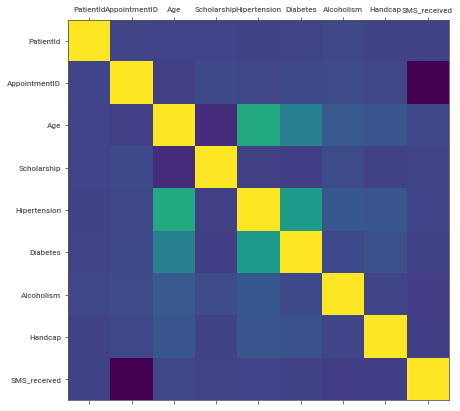

In [104]:
plot_corr(df)

In [105]:
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


In [106]:
num_true = len(df.loc[df['Hipertension'] == True])
num_false = len(df.loc[df['Hipertension'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 21801 (19.72%)
Número de Casos Falsos     : 88726 (80.28%)


In [107]:
import sklearn as sk
sk.__version__

'1.0.2'

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
atributos = ['AppointmentID', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

In [110]:
atributos_prev = ['Hipertension']

In [111]:
x = df[atributos].values
y = df[atributos_prev].values

In [112]:
x

array([[5642903,      62,       0, ...,       0,       0,       0],
       [5642503,      56,       0, ...,       0,       0,       0],
       [5642549,      62,       0, ...,       0,       0,       0],
       ...,
       [5630692,      21,       0, ...,       0,       0,       1],
       [5630323,      38,       0, ...,       0,       0,       1],
       [5629448,      54,       0, ...,       0,       0,       1]])

In [113]:
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [114]:
df.isnull().values.any()

False

In [115]:
from sklearn.impute import SimpleImputer

In [116]:
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")
x_treino = preenche_0.fit_transform(x_treino)

In [117]:
x_treino

array([[5.687610e+06, 2.500000e+01, 1.000000e+00, ..., 1.000000e+00,
        1.100000e+00, 1.000000e+00],
       [5.694484e+06, 6.200000e+01, 1.000000e+00, ..., 1.000000e+00,
        1.100000e+00, 1.000000e+00],
       [5.500939e+06, 6.500000e+01, 1.000000e+00, ..., 1.000000e+00,
        1.100000e+00, 1.000000e+00],
       ...,
       [5.762864e+06, 3.800000e+01, 1.000000e+00, ..., 1.000000e+00,
        1.100000e+00, 1.000000e+00],
       [5.639951e+06, 1.800000e+01, 1.000000e+00, ..., 1.000000e+00,
        1.100000e+00, 1.000000e+00],
       [5.637593e+06, 9.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.100000e+00, 1.000000e+00]])

In [118]:
split_test_size = 0.20

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = split_test_size, random_state = 42)

In [121]:
print('{0:0.2f}% nos dados de treino'.format((len(x_treino)/len(df.index)) *100))
print('{0:0.2f}% nos dados de teste'.format((len(x_teste)/len(df.index)) *100))

80.00% nos dados de treino
20.00% nos dados de teste


In [122]:
modelo_tree = DecisionTreeClassifier(random_state=1)
modelo_tree.fit(x_treino, y_treino)
y_forecast_tree = modelo_tree.predict(x_teste)

In [123]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_teste, y_forecast_tree)))
print()
print("Classification Report")
print(metrics.classification_report(y_teste, y_forecast_tree, labels = [1, 0]))

Exatidão (Accuracy): 1.0000

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4288
           0       1.00      1.00      1.00     17818

    accuracy                           1.00     22106
   macro avg       1.00      1.00      1.00     22106
weighted avg       1.00      1.00      1.00     22106

